Математическое описание состояния движущейся жидкости описывается 

$$
v = f(x, y, z, t)
$$
$$
p = f(x, y, z, t)
$$
$$
\rho = f(x, y, z, t)
$$

Закон сохранения вещества в гидродинамике

Количество жидкости в рассматриваемом объеме есть: 
$$
\int \rho \, dV \tag{1}
$$

Жидкость вытекает через поверхность $df$ со скоростью $v$ \
Полное количество вытекаемой жидкости: 
$$
\oint \rho v \, df \tag{2}
$$

Вытекание жидкости также можно определить через время:
$$
-\frac{d}{dt} \int \rho \,dV \tag{3}
$$

Приравниваем #2 и #3
$$
\frac{d}{dt} \int \rho \,dV = - \oint \rho v \, df \tag{4}
$$

Преобразуем поверхностный интграл в объемный 
$$
\oint \rho v \, df = \int div \rho v \, dV
$$

Получаем
$$
\frac{d}{dt} \int \rho \,dV = \int div \rho v \, dV
$$

$$
\int (\frac{d\rho}{dt} + div \rho v ) \,dV = 0
$$

Поскольку равенство должно работать для любого объема 
$$
\frac{d\rho}{dt} + div \rho v = 0 \tag {5, Уравнение непрерывности}
$$


Дивергенция векторного поля ρv в точке отвечает на вопрос:

Является ли данная точка источником или стоком массы?\
Если div(ρv)>0 — в точке источается масса (источник).\
Если div(ρv)<0 — в точке поглощается масса (сток).\
Если div(ρv)=0 — масса сохраняется: сколько втекает, столько и вытекает (нет источников/стоков).

Интерпретация:

Если плотность в точке растёт ($\frac{d\rho}{dt} > 0 $), то в неё должно втекать больше массы, чем вытекать (div(ρv)<0).

Если плотность падает ($\frac{d\rho}{dt} < 0 $), то из точки вытекает больше массы, чем втекает (div(ρv)>0).


Численная сила давления: 245250.00 Н
Аналитическая сила давления: 245250.00 Н
Относительная погрешность: 0.0000 %


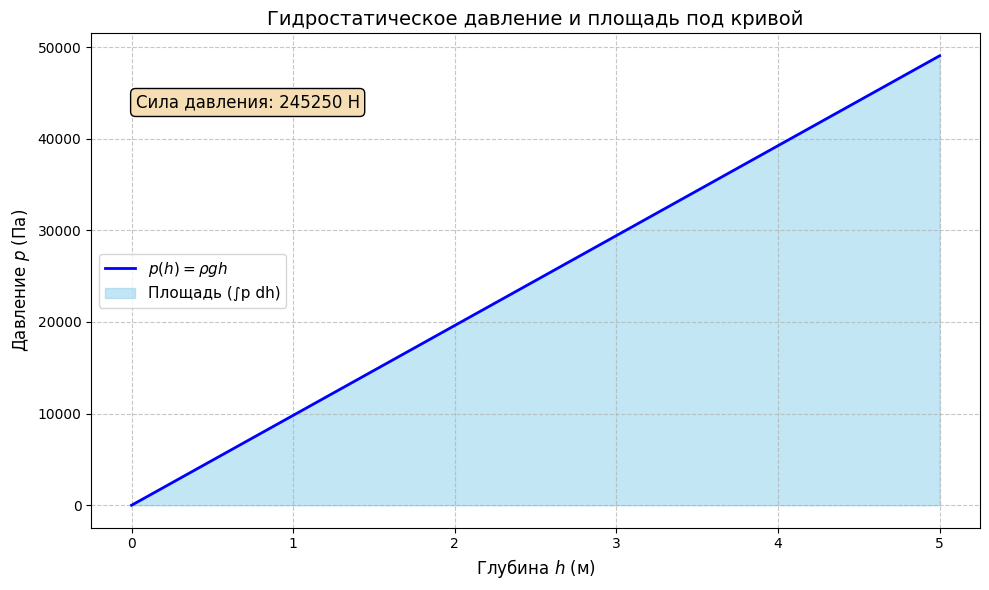

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры задачи
rho = 1000      # плотность воды, кг/м³
g = 9.81       # ускорение свободного падения, м/с²
H = 5          # максимальная глубина, м
w = 2          # ширина стенки, м

# Создаём массив глубин (от 0 до H)
h = np.linspace(0, H, 1000)  # 1000 точек для плавности

# Функция давления: p(h) = rho * g * h
p = rho * g * h

# Численное интегрирование (метод трапеций)
integral_numeric = np.trapezoid(p, h)  # ∫ p(h) dh
force_numeric = w * integral_numeric  # F = w * ∫ p dh

# Аналитическое значение силы
force_analytic = 0.5 * w * rho * g * H**2

# Вывод результатов
print(f"Численная сила давления: {force_numeric:.2f} Н")
print(f"Аналитическая сила давления: {force_analytic:.2f} Н")
print(f"Относительная погрешность: {abs(force_numeric - force_analytic) / force_analytic * 100:.4f} %")

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(h, p, label=r'$p(h) = \rho g h$', color='blue', linewidth=2)

# Закрашиваем площадь под кривой (сила на единицу ширины)
plt.fill_between(h, p, color='skyblue', alpha=0.5, label='Площадь (∫p dh)')

plt.xlabel('Глубина $h$ (м)', fontsize=12)
plt.ylabel('Давление $p$ (Па)', fontsize=12)
plt.title('Гидростатическое давление и площадь под кривой', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=11)
plt.tight_layout()

# Добавляем текстовую аннотацию с результатом
plt.annotate(f'Сила давления: {force_numeric:.0f} Н',
             xy=(0.05, 0.85), xycoords='axes fraction',
             fontsize=12, bbox=dict(boxstyle="round, pad=0.3", facecolor="wheat"))

plt.show()
